In [4]:
#========= ML - HW 2 By Ofek Marom ==========
print('========= ML - HW 2 By Ofek Marom ==========')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from IPython.display import Image

df = pd.read_csv("Dry_Beans_Dataset.csv") #df = pd.read_csv("Dry_Beans_Dataset.csv", header=None)
df.head(5)


========= ML - HW 2 By Ofek Marom ==========


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  44830    814.955       320.731947       178.405838      1.797766   
1  33476    691.826       258.837971       165.220760      1.566619   
2  27057    606.138       227.460904       151.860320      1.497830   
3  49483    844.283       326.602913       194.689529      1.677558   
4  22461    544.584       192.801303       148.541136      1.297966   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.831018       45297     238.912806  0.658877  0.989690   0.848226   
1      0.769773       33907     206.453305  0.721155  0.987289   0.878921   
2      0.744491       27358     185.607226  0.801831  0.988998   0.925436   
3      0.802907       50289     251.005403  0.680179  0.983973   0.872348   
4      0.637517       22699     169.110122  0.774731  0.989515   0.951720   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.744899      0.007154      0.001359      0.554874      0.997534   
1     0.797616      0.007732      0.001930      0.636191      0.996669   
2     0.815996      0.008407      0.002299      0.665850      0.997330   
3     0.768534      0.006600      0.001420      0.590644      0.990840   
4     0.877121      0.008584      0.003134      0.769342      0.998579   

      Class  
0      SIRA  
1  DERMASON  
2  DERMASON  
3      SIRA  
4  DERMASON

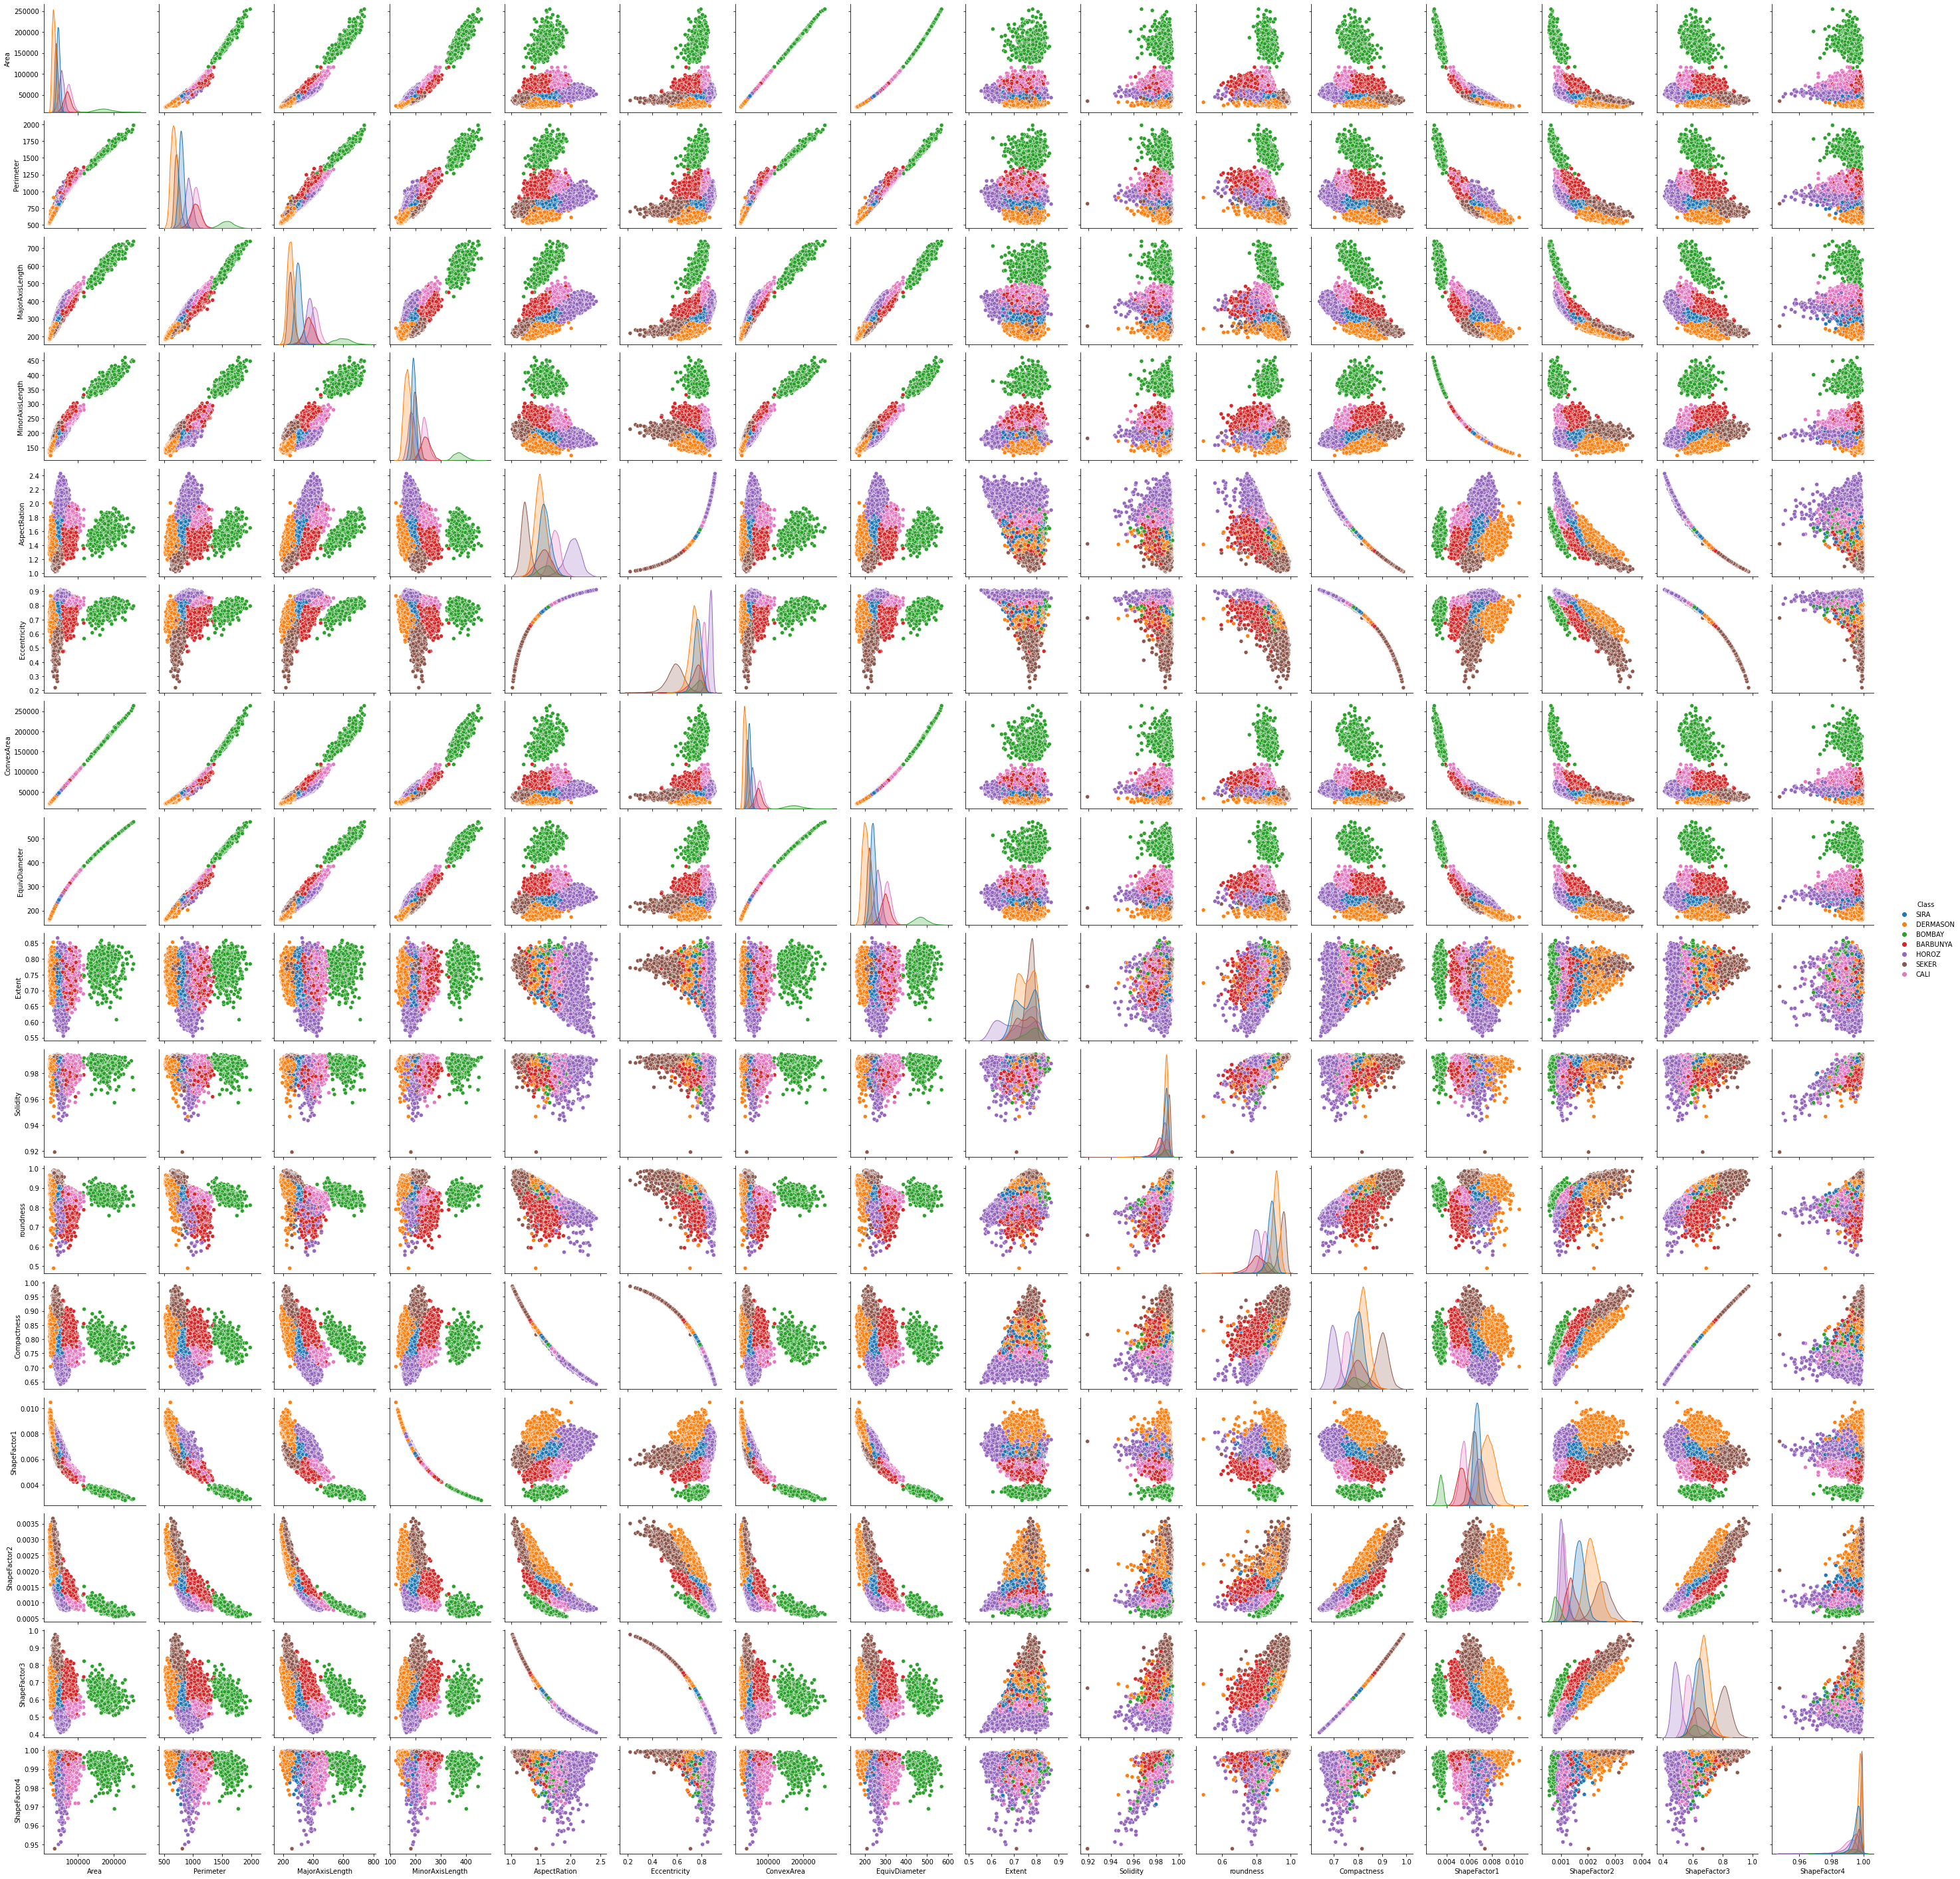

In [34]:
# Drop all rows containing NaN values from the data frame
df.dropna(inplace=True)
sns.pairplot(df, hue='Class')

In [5]:
#Exercise 1.1 : Data Preprocessing (10 points)
#As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
#Normalize each field of the input data using the min-max normalization technique.

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=21)

X_train, y_train = train.drop(columns=['Class']), train['Class']
X_test, y_test = test.drop(columns=['Class']), test['Class']

X_train.head(5)



Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
1717   58526    977.222       410.371713       182.706847      2.246066   
13308  84766   1131.169       452.902255       239.685530      1.889569   
12481  71275   1020.728       398.323785       229.521972      1.735449   
13104  34663    691.502       252.525161       175.379706      1.439877   
3851   68440   1016.553       396.865016       224.812263      1.765317   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
1717       0.895420       59193     272.979152  0.654756  0.988732   0.770145   
13308      0.848484       85821     328.523094  0.740036  0.987707   0.832485   
12481      0.817295       72017     301.247653  0.775841  0.989697   0.859661   
13104      0.719489       35079     210.081656  0.777965  0.988141   0.910939   
3851       0.824082       70598     295.195722  0.767660  0.969433   0.832262   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
1717      0.665200      0.007012      0.000847      0.442491      0.993863  
13308     0.725373      0.005343      0.000912      0.526166      0.994227  
12481     0.756288      0.005589      0.001128      0.571972      0.992629  
13104     0.831924      0.007285      0.002153      0.692097      0.996534  
3851      0.743819      0.005799      0.001095      0.553267      0.976691

In [28]:
y_train.head(5)

1717     HOROZ
13308     CALI
12481     CALI
13104     SIRA
3851      CALI
Name: Class, dtype: object

In [6]:
#Normalize each field of the input data using the min-max normalization technique.
scaler = MinMaxScaler() # replace StandardScaler with other scalings such as MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
print('dimensions n*k of X train and X test array')
print(X_train_scale.shape, X_test_scale.shape)
print('dimensions n*k of X test and X test array')
print(X_test_scale.shape, X_test_scale.shape)

dimensions n*k of X train and X test array
(12249, 16) (1362, 16)
dimensions n*k of X test and X test array
(1362, 16) (1362, 16)


In [7]:
print('Convert Train class to one-hot encoding')
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
print(encoded_Y)
# convert integers to one hot encoded
y_train_hot_encoded = np_utils.to_categorical(encoded_Y, num_classes=None, dtype="float32")
print('y_train_hot_encoded')
print(y_train_hot_encoded)


uniques, ids = np.unique(encoded_Y, return_inverse=True)
y_code = np_utils.to_categorical(ids, len(uniques))

print('--------------')
print(y_code)
a = uniques[y_code.argmax(1)]
print(a)


Convert Train class to one-hot encoding
[4 2 2 ... 2 6 4]
y_train_hot_encoded
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]
--------------
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]
[4 2 2 ... 2 6 4]


In [8]:
print('Convert Test class to one-hot encoding')
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
print(encoded_Y)
# convert integers to one hot encoded
y_test_hot_encoded = np_utils.to_categorical(encoded_Y, num_classes=None, dtype="float32")
print('y_Test_hot_encoded')
print(y_test_hot_encoded)


Convert Test class to one-hot encoding
[4 6 4 ... 6 2 6]
y_Test_hot_encoded
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


score     =  0.882525697503671
n_layers  =  4
n_iter    =  123
loss      =  0.4381976213506168
model score: Return the mean accuracy on the given test data and labels
best_loss = 0.4363887607793255


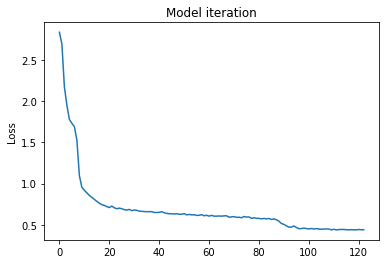

In [9]:
#Exercise 1.2 : Training and Testing the Neural Network (40 points)

#Number of nodes in each hidden layer should be (12, 3)
#Learning rate should be 0.3
#Number of epochs should be 500
#The sigmoid function should be used as the activation function in each layer
#Stochastic Gradient Descent should be used to minimize the error rate
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

clf = MLPClassifier(learning_rate_init = 0.3,hidden_layer_sizes=(12,3),activation="logistic",solver = 'sgd', max_iter = 500, random_state=1)
clf.fit(X_train_scale, y_train_hot_encoded)

print ('score     = ',clf.score(X_test_scale, y_test_hot_encoded))
print ('n_layers  = ',clf.n_layers_)
print ('n_iter    = ',clf.n_iter_)
print ('loss      = ',clf.loss_)

y_pred = clf.predict(X_test_scale) 
print('model score: Return the mean accuracy on the given test data and labels')
print('best_loss =',clf.best_loss_)
plt.ylabel('Loss')
plt.title('Model iteration')
plt.plot(clf.loss_curve_)


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Create confusion_matrix')
print('Convert y_predict and y_test matrix into simple_array')

y_pred_simple_array = np.argmax(y_pred, axis=-1)
print(y_pred_simple_array)
y_test_simple_array = np.argmax(y_test_hot_encoded, axis=-1)
print(y_test_simple_array)
cm =confusion_matrix(y_test_simple_array,y_pred_simple_array)
print(cm)

#claculate TP,TN,FP,FN for every class
print('Self statistic generating')
Class_Size = len(cm)
for i in range(Class_Size):
  print('-----------------------')
  print('Class id = ',i )
  TP = 0
  FP = 0
  FN = 0
  TN = 0
  # Cal TP - true positive
  TP = cm[i][i]
  # Cal FP - false positive
  for l in range (Class_Size):
    FP = FP + cm[l][i]
  FP = FP - TP
  # Cal FN - false negative
  for l in range (Class_Size):
    FN = FN + cm[i][l]
  FN = FN - TP
  # Cal TN - true negative
  for l in range(Class_Size):
    for k in range(Class_Size):
      TN = TN + cm[l][k]
  TN = TN - FP - FN
  #Cal Precision 
  Precision = TP/(TP+FP)
  #Cal Recall 
  Recall = TP/(TP+FN)
  #true positive, true negative, false positive, and false negative
  print('true positive  =',TP)
  print('true negative  =',TN)
  print('false positive =',FP)
  print('false negative =',FN)
  print('Precision: TP/(TP+FP) = ',Precision)  
  print('Recall   : TP/(TP+FN) = ',Recall)
print('-------------------------')
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test_simple_array,y_pred_simple_array)))

print('Using classification_report')
print(classification_report(y_test_simple_array,y_pred_simple_array))

Create confusion_matrix
Convert y_predict and y_test matrix into simple_array
[4 6 4 ... 6 2 6]
[4 6 4 ... 6 2 6]
[[118   0   1   0   0   1   0]
 [  0  59   0   0   0   0   0]
 [ 34   0 135   0   0   0   1]
 [  5   0   0 294   1   5  33]
 [ 11   0   2   2 167   0   8]
 [  8   0   0   1   0 208   5]
 [ 14   0   0  14   1   2 232]]
Self statistic generating
-----------------------
Class id =  0
true positive  = 118
true negative  = 1288
false positive = 72
false negative = 2
Precision: TP/(TP+FP) =  0.6210526315789474
Recall   : TP/(TP+FN) =  0.9833333333333333
-----------------------
Class id =  1
true positive  = 59
true negative  = 1362
false positive = 0
false negative = 0
Precision: TP/(TP+FP) =  1.0
Recall   : TP/(TP+FN) =  1.0
-----------------------
Class id =  2
true positive  = 135
true negative  = 1324
false positive = 3
false negative = 35
Precision: TP/(TP+FP) =  0.9782608695652174
Recall   : TP/(TP+FN) =  0.7941176470588235
-----------------------
Class id =  3
true positiv

In [17]:
#Exercise 2 : k-fold Cross Validation (20 points)
#In order to avoid using biased models, use 10-fold cross validation to generalize the model based on the given data set.
#
#Requirements :
#The accuracy and MSE values during each iteration of the cross validation
#The overall average accuracy and MSE value
from sklearn.model_selection import cross_validate 
from sklearn.metrics import log_loss, make_scorer

K = 10
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
scores = cross_validate(clf,X_train_scale, y_train_hot_encoded, cv=K,
                             scoring=('accuracy','neg_log_loss','average_precision'),
                             return_train_score=True)
#print(scores)
total_loss     = 0
total_accuracy = 0
for i in range(K):
  print('Training Set ', i ,'|accuracy = ',scores['test_accuracy'][i],'|loss = ', -1 * scores['test_neg_log_loss'][i])
  total_loss = total_loss         + (-1) * scores['test_neg_log_loss'][i]
  total_accuracy = total_accuracy + scores['test_accuracy'][i]

print('average accuracy = ',total_accuracy/K)
print('average loss     = ',total_loss/K)


Training Set  0 |accuracy =  0.9085714285714286 |loss =  0.2519516909368718
Training Set  1 |accuracy =  0.8351020408163266 |loss =  0.41416366701238233
Training Set  2 |accuracy =  0.9151020408163265 |loss =  0.23481069790017417
Training Set  3 |accuracy =  0.9183673469387755 |loss =  0.23759721583720403
Training Set  4 |accuracy =  0.8808163265306123 |loss =  0.2909472819887112
Training Set  5 |accuracy =  0.8873469387755102 |loss =  0.2679364717812848
Training Set  6 |accuracy =  0.8881632653061224 |loss =  0.29008261937042545
Training Set  7 |accuracy =  0.8824489795918368 |loss =  0.319870222948165
Training Set  8 |accuracy =  0.8751020408163265 |loss =  0.3322559465383899
Training Set  9 |accuracy =  0.8937908496732027 |loss =  0.2549540079810642
average accuracy =  0.8884811257836468
average loss     =  0.28945698222946736


In [220]:
#Exercise 3 : Hyperparameter Tuning (30 points)
#Use either grid search or random search methodology to find the optimal number of nodes required in each hidden layer,
#as well as the optimal learning rate and the number of epochs,
#such that the accuracy of the model is maximum for the given data set.
#
#Requirements :
#
#The set of optimal hyperparameters
#The maximum accuracy achieved using this set of optimal hyperparameters
#Note : Hyperparameter tuning takes a lot of time to execute.
#Make sure that you choose the appropriate number of each hyperparameter (preferably 3 of each),
#and that you allocate enough time to execute your code.

#parameter_space = {
#    'learning_rate_init' :[0.1,0.01,0.3], #The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
#    'hidden_layer_sizes' :[(5,5), (7,7), (8,4)], #The ith element represents the number of neurons in the ith hidden layer.
#    'n_iter_no_change'   :[5,20,30] # Maximum number of epochs to not meet tol improvement. Only effective when solver=’sgd’ or ‘adam’.
#}

from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier()
parameter_space = {
    'learning_rate_init' :[0.1,0.01,0.3], #The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
    'hidden_layer_sizes' :[(5,5), (7,7), (8,4)], #The ith element represents the number of neurons in the ith hidden layer.
    'n_iter_no_change'   :[5,20,30], # Maximum number of epochs to not meet tol improvement. Only effective when solver=’sgd’ or ‘adam’.
    'activation': ['logistic'],
    'solver'    : ['sgd'],
    'max_iter'  : [500],
    'random_state': [1]
}

print(parameter_space)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
print('Finish GridSearchCV configuration')
print('Strart GridSearchCV to search the best parameters.. please wait')
clf.fit(X_train_scale, y_train_hot_encoded)

print('===  Best parameters found in in GridSearchCV ===:\n')
print(clf.best_params_)

print('GridSearchCV search for best parameters.. finish')


{'learning_rate_init': [0.1, 0.01, 0.3], 'hidden_layer_sizes': [(5, 5), (7, 7), (8, 4)], 'n_iter_no_change': [5, 20, 30], 'activation': ['logistic'], 'solver': ['sgd'], 'max_iter': [500], 'random_state': [1]}
Finish GridSearchCV configuration
Strart GridSearchCV to search the best parameters.. please wait
===  Best parameters found in in GridSearchCV ===:

{'activation': 'logistic', 'hidden_layer_sizes': (7, 7), 'learning_rate_init': 0.3, 'max_iter': 500, 'n_iter_no_change': 30, 'random_state': 1, 'solver': 'sgd'}
GridSearchCV search for best parameters.. finish


In [223]:
# The Best parameters found in GridSearchCV
print('===  Best parameters found in in GridSearchCV ===:\n')
print(clf.best_params_)

print('--------- All results-----------')
#print(clf.cv_results_)
print('----')

means = clf.cv_results_['mean_test_score']
stds =  clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))



===  Best parameters found in in GridSearchCV ===:

{'activation': 'logistic', 'hidden_layer_sizes': (7, 7), 'learning_rate_init': 0.3, 'max_iter': 500, 'n_iter_no_change': 30, 'random_state': 1, 'solver': 'sgd'}
--------- All results-----------
----
0.901 (+/-0.012) for {'activation': 'logistic', 'hidden_layer_sizes': (5, 5), 'learning_rate_init': 0.1, 'max_iter': 500, 'n_iter_no_change': 5, 'random_state': 1, 'solver': 'sgd'}
0.900 (+/-0.012) for {'activation': 'logistic', 'hidden_layer_sizes': (5, 5), 'learning_rate_init': 0.1, 'max_iter': 500, 'n_iter_no_change': 20, 'random_state': 1, 'solver': 'sgd'}
0.905 (+/-0.011) for {'activation': 'logistic', 'hidden_layer_sizes': (5, 5), 'learning_rate_init': 0.1, 'max_iter': 500, 'n_iter_no_change': 30, 'random_state': 1, 'solver': 'sgd'}
0.889 (+/-0.015) for {'activation': 'logistic', 'hidden_layer_sizes': (5, 5), 'learning_rate_init': 0.01, 'max_iter': 500, 'n_iter_no_change': 5, 'random_state': 1, 'solver': 'sgd'}
0.889 (+/-0.015) for {

{'activation': 'logistic', 'hidden_layer_sizes': (7, 7), 'learning_rate_init': 0.3, 'max_iter': 500, 'n_iter_no_change': 30, 'random_state': 1, 'solver': 'sgd'}
score     =  0.9148311306901615
n_layers  =  4
n_iter    =  175
loss      =  0.37789827028657125
model score: Return the mean accuracy on the given test data and labels
best_loss = 0.37741660917669134


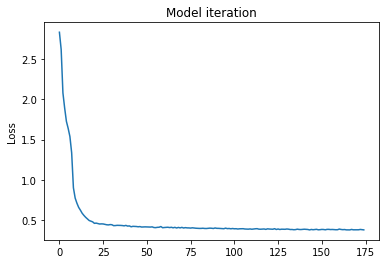

In [224]:
#clf1 = MLPClassifier(clf.best_params_)
print(clf.best_params_)
# ============ this is the best param I have got by using GridSearchCV ==============
clf1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (7, 7), learning_rate_init = 0.3, max_iter = 500, n_iter_no_change = 30, random_state = 1, solver = 'sgd')
clf1.fit(X_train_scale, y_train_hot_encoded)

print ('score     = ',clf1.score(X_test_scale, y_test_hot_encoded))
print ('n_layers  = ',clf1.n_layers_)
print ('n_iter    = ',clf1.n_iter_)
print ('loss      = ',clf1.loss_)

y_pred = clf1.predict(X_test_scale) 
print('model score: Return the mean accuracy on the given test data and labels')
print('best_loss =',clf1.best_loss_)
plt.ylabel('Loss')
plt.title('Model iteration')
plt.plot(clf1.loss_curve_)

In [225]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Create confusion_matrix')
print('Convert y_predict and y_test matrix into simple_array')

y_pred_simple_array = np.argmax(y_pred, axis=-1)
print(y_pred_simple_array)
y_test_simple_array = np.argmax(y_test_hot_encoded, axis=-1)
print(y_test_simple_array)
cm =confusion_matrix(y_test_simple_array,y_pred_simple_array)
print(cm)

#claculate TP,TN,FP,FN for every class
print('Self statistic generating')
Class_Size = len(cm)
for i in range(Class_Size):
  print('-----------------------')
  print('Class id = ',i )
  TP = 0
  FP = 0
  FN = 0
  TN = 0
  # Cal TP - true positive
  TP = cm[i][i]
  # Cal FP - false positive
  for l in range (Class_Size):
    FP = FP + cm[l][i]
  FP = FP - TP
  # Cal FN - false negative
  for l in range (Class_Size):
    FN = FN + cm[i][l]
  FN = FN - TP
  # Cal TN - true negative
  for l in range(Class_Size):
    for k in range(Class_Size):
      TN = TN + cm[l][k]
  TN = TN - FP - FN
  #Cal Precision 
  Precision = TP/(TP+FP)
  #Cal Recall 
  Recall = TP/(TP+FN)
  #true positive, true negative, false positive, and false negative
  print('true positive  =',TP)
  print('true negative  =',TN)
  print('false positive =',FP)
  print('false negative =',FN)
  print('Precision: TP/(TP+FP) = ',Precision)  
  print('Recall   : TP/(TP+FN) = ',Recall)
print('-------------------------')
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test_simple_array,y_pred_simple_array)))

print('Using classification_report')
print(classification_report(y_test_simple_array,y_pred_simple_array))

Create confusion_matrix
Convert y_predict and y_test matrix into simple_array
[4 6 4 ... 6 2 6]
[4 6 4 ... 6 2 6]
[[116   0   3   0   0   0   1]
 [  0  59   0   0   0   0   0]
 [ 10   0 157   0   2   0   1]
 [  3   0   0 313   1   3  18]
 [  5   0   1   3 175   0   6]
 [  8   0   0   9   0 198   7]
 [  4   0   0  27   1   1 230]]
Self statistic generating
-----------------------
Class id =  0
true positive  = 116
true negative  = 1328
false positive = 30
false negative = 4
Precision: TP/(TP+FP) =  0.7945205479452054
Recall   : TP/(TP+FN) =  0.9666666666666667
-----------------------
Class id =  1
true positive  = 59
true negative  = 1362
false positive = 0
false negative = 0
Precision: TP/(TP+FP) =  1.0
Recall   : TP/(TP+FN) =  1.0
-----------------------
Class id =  2
true positive  = 157
true negative  = 1345
false positive = 4
false negative = 13
Precision: TP/(TP+FP) =  0.9751552795031055
Recall   : TP/(TP+FN) =  0.9235294117647059
-----------------------
Class id =  3
true positiv

In [ ]:
print('--------- GridSearchCV effect -------')
print('Accuracy pre GridSearchCV = 0.89 |    Accuracy post GridSearchCV =  0.92|')
print('loss     pre GridSearchCV = 0.43 |    Loss     post GridSearchCV =  0.37|')

print('classification_report pre GridSearchCV')
             precision    recall  f1-score   support

           0       0.62      0.98      0.76       120
           1       1.00      1.00      1.00        59
           2       0.98      0.79      0.88       170
           3       0.95      0.87      0.91       338
           4       0.99      0.88      0.93       190
           5       0.96      0.94      0.95       222
           6       0.83      0.88      0.86       263

    accuracy                           0.89      1362
   macro avg       0.90      0.91      0.90      1362
weighted avg       0.91      0.89      0.89      1362

print('classification_report post GridSearchCV')
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       120
           1       1.00      1.00      1.00        59
           2       0.98      0.92      0.95       170
           3       0.89      0.93      0.91       338
           4       0.98      0.92      0.95       190
           5       0.98      0.89      0.93       222
           6       0.87      0.87      0.87       263

    accuracy                           0.92      1362
   macro avg       0.93      0.93      0.93      1362
weighted avg       0.92      0.92      0.92      1362
